# ECG-ViEW 

In [2]:
import pandas as pd
import numpy as np
import pylab as plt

#Visualization Libraries
import seaborn as sns

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))
# Size of matplotlib histogram bins
bin_size = 40

## 1. ECG data processing

In [3]:
df_one = pd.read_csv('Electrocardiogram.csv')
df_one.head()

,personid,ecgdate,ecgdept,ecgsource,RR,PR,QRS,QT,QTc,P_wave_axis,QRS_axis,T_wave_axis,ACCI
0,120971,2006-05-23 09:57:00,H,M,952.0,NaN,NaN,388,397,NaN,NaN,NaN,9
1,120971,2012-04-19 08:09:06,H,E,750.0,140.0,84.0,360,415,NaN,NaN,NaN,9
2,270,2004-07-03 09:05:13,O,M,600.0,122.0,78.0,318,410,62.0,86.0,61.0,7
3,306709,2013-04-06 22:10:16,E,M,577.0,150.0,92.0,362,476,17.0,46.0,70.0,12
4,87768,1997-12-17 11:11:26,O,M,698.0,136.0,88.0,354,423,28.0,59.0,29.0,3


In [4]:
df_one.shape

(979273, 13)

In [5]:
df_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979273 entries, 0 to 979272
Data columns (total 13 columns):
personid       979273 non-null int64
ecgdate        979273 non-null object
ecgdept        979273 non-null object
ecgsource      979273 non-null object
RR             979239 non-null float64
PR             774260 non-null float64
QRS            810373 non-null float64
QT             979273 non-null int64
QTc            979273 non-null int64
P_wave_axis    732827 non-null float64
QRS_axis       762274 non-null float64
T_wave_axis    762248 non-null float64
ACCI           979273 non-null int64
dtypes: float64(6), int64(4), object(3)
memory usage: 97.1+ MB


In [6]:
df_one.describe()

,personid,RR,PR,QRS,QT,QTc,P_wave_axis,QRS_axis,T_wave_axis,ACCI
count,979273.000000,979239.000000,774260.000000,810373.000000,979273.000000,979273.000000,732827.000000,762274.000000,762248.000000,979273.000000
mean,231021.688946,851.683240,157.081364,91.061474,389.997336,425.415081,48.357848,45.215670,46.198097,7.580933
std,133238.981417,196.989159,26.661289,15.149489,43.490019,31.493654,24.848064,38.048566,38.416339,3.062956
min,1.000000,204.000000,36.000000,2.000000,70.000000,53.000000,-89.000000,-89.000000,-89.000000,0.000000
25%,115711.000000,732.000000,140.000000,82.000000,364.000000,405.000000,36.000000,22.000000,28.000000,6.000000
50%,231037.000000,857.000000,156.000000,88.000000,390.000000,420.000000,52.000000,51.000000,44.000000,8.000000
75%,346411.000000,968.000000,172.000000,98.000000,416.000000,440.000000,65.000000,71.000000,59.000000,10.000000
max,461795.000000,30000.000000,1738.000000,380.000000,852.000000,878.000000,270.000000,270.000000,270.000000,23.000000


In [7]:
#df_one = df_one.sort_values('ecgdate').drop_duplicates('personid',keep='last')
#df_one.shape

In [8]:
df_one.dtypes

personid         int64
ecgdate         object
ecgdept         object
ecgsource       object
RR             float64
PR             float64
QRS            float64
QT               int64
QTc              int64
P_wave_axis    float64
QRS_axis       float64
T_wave_axis    float64
ACCI             int64
dtype: object

Text(0.5, 1.0, 'T wave axis')

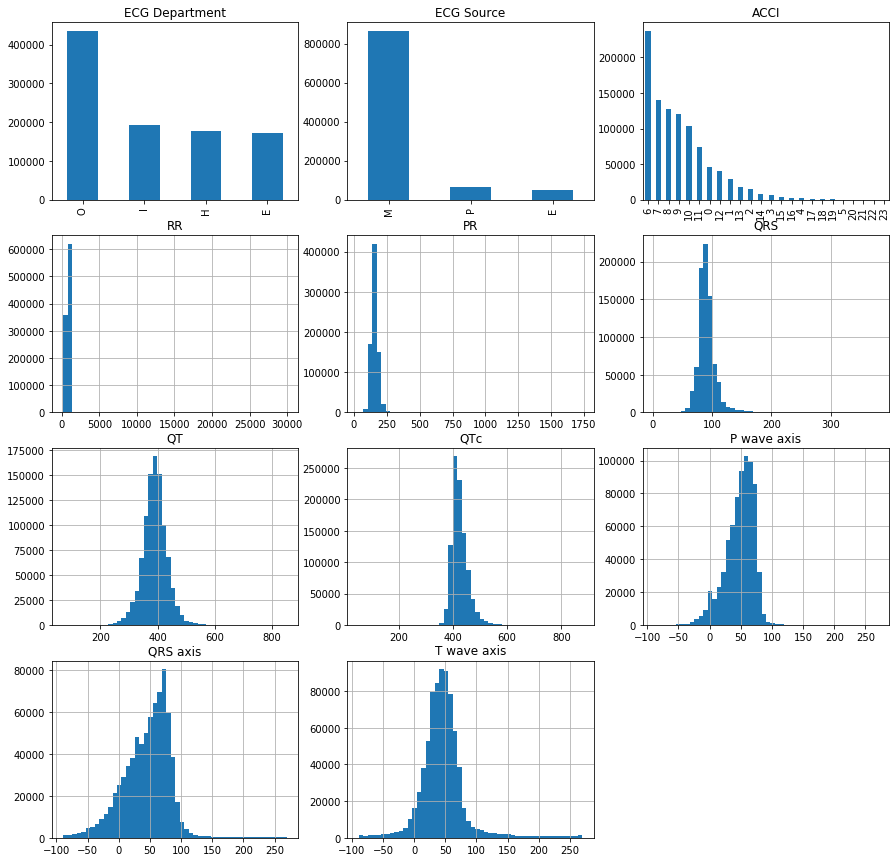

In [9]:
fig = plt.figure(figsize = (15,15))
fig_dim = (4,3)

plt.subplot2grid(fig_dim, (0,0))
df_one['ecgdept'].value_counts().plot(kind='bar', title='ECG Department')

plt.subplot2grid(fig_dim, (0,1))
df_one['ecgsource'].value_counts().plot(kind='bar', title='ECG Source')

plt.subplot2grid(fig_dim, (0,2))
df_one['ACCI'].value_counts().plot(kind='bar', title='ACCI')

plt.subplot2grid(fig_dim, (1,0))
df_one['RR'].hist(bins=50)
plt.title('RR')

plt.subplot2grid(fig_dim, (1,1))
df_one['PR'].hist(bins=50)
plt.title('PR')

plt.subplot2grid(fig_dim, (1,2))
df_one['QRS'].hist(bins=50)
plt.title('QRS')

plt.subplot2grid(fig_dim, (2,0))
df_one['QT'].hist(bins=50)
plt.title('QT')

plt.subplot2grid(fig_dim, (2,1))
df_one['QTc'].hist(bins=50)
plt.title('QTc')

plt.subplot2grid(fig_dim, (2,2))
df_one['P_wave_axis'].hist(bins=50)
plt.title('P wave axis')

plt.subplot2grid(fig_dim, (3,0))
df_one['QRS_axis'].hist(bins=50)
plt.title('QRS axis')

plt.subplot2grid(fig_dim, (3,1))
df_one['T_wave_axis'].hist(bins=50)
plt.title('T wave axis')

In [10]:
df_one.isnull().sum()

personid            0
ecgdate             0
ecgdept             0
ecgsource           0
RR                 34
PR             205013
QRS            168900
QT                  0
QTc                 0
P_wave_axis    246446
QRS_axis       216999
T_wave_axis    217025
ACCI                0
dtype: int64

In [11]:
# Drop instances that have missing values 
df_two = df_one.dropna(subset=['RR', 'PR', 'QRS', 'P_wave_axis','QRS_axis', 'T_wave_axis']);

In [12]:
df_two.isnull().sum()

personid       0
ecgdate        0
ecgdept        0
ecgsource      0
RR             0
PR             0
QRS            0
QT             0
QTc            0
P_wave_axis    0
QRS_axis       0
T_wave_axis    0
ACCI           0
dtype: int64

In [13]:
df_two.shape

(726444, 13)

In [14]:
# Drop unrelevant information 
df_three = df_two.drop(columns = ['ecgdate', 'ecgsource', 'ecgdept'])

In [15]:
df_three.head()

,personid,RR,PR,QRS,QT,QTc,P_wave_axis,QRS_axis,T_wave_axis,ACCI
2,270,600.0,122.0,78.0,318,410,62.0,86.0,61.0,7
3,306709,577.0,150.0,92.0,362,476,17.0,46.0,70.0,12
4,87768,698.0,136.0,88.0,354,423,28.0,59.0,29.0,3
5,209545,638.0,112.0,94.0,368,460,14.0,132.0,-3.0,6
8,269001,741.0,136.0,84.0,362,420,65.0,42.0,31.0,7


## 2. Diagnosis code & personal info (sex)

In [16]:
df_diag_one = pd.read_csv('Diagnosis.csv', encoding='latin-1')
df_diag_one.head()

,personid,diagdate,diagcode,diaglocalcode,diagdept
0,141778,6/4/1997 0:00,L73.8,DC12467,O
1,141778,6/7/1997 0:00,L73.8,DC12467,O
2,141778,6/16/1997 0:00,L73.8,DC12467,O
3,141778,6/23/1997 0:00,L73.8,DC12467,O
4,141778,6/30/1997 0:00,L73.8,DC12467,O


In [17]:
df_diag_one.shape

(1048575, 5)

In [18]:
# Drop duplicate entries (repeated entry of the same ID)
df_diag_two = df_diag_one.sort_values('diagdate').drop_duplicates('personid',keep='last')
df_diag_two.sort_values(by=['personid'])

,personid,diagdate,diagcode,diaglocalcode,diagdept
673127,7,6/21/2002 0:00,K05.3,DC3060,O
338532,12,6/29/2000 0:00,R07.4,DC7933,O
994758,24,4/1/2005 0:00,G43.9,DC12570,O
288805,30,9/29/2003 0:00,H66.9C,DC14257,O
1012578,46,11/14/2001 0:00,C73,DC4775,O
999910,61,5/3/1997 0:00,K21.9,DC1091,O
995053,63,6/7/1997 0:00,L40.0,DC9006,O
808966,65,4/22/2002 0:00,K29.5,DC2704,O
735901,73,2/1/2006 0:00,J34.2,DC5890,O
1013905,94,9/18/2001 0:00,I08.9,DC14388,O


In [19]:
df_diag_two.shape

(33821, 5)

In [20]:
df_person = pd.read_csv('Person.csv')
df_person.head()

,personid,sex,Birthyeargroup,ethnicity
0,369485,1,16,1
1,138392,0,14,1
2,188469,1,20,1
3,169164,0,12,1
4,434516,1,14,1


In [21]:
df_person.shape

(461034, 4)

In [22]:
# Merge the diagnosis dataset with the personal info dataset with the common column (personid)
df_diag_person = pd.merge(df_diag_two, df_person, on='personid')

In [23]:
df_diag_person.head()

,personid,diagdate,diagcode,diaglocalcode,diagdept,sex,Birthyeargroup,ethnicity
0,125349,1/1/2005 9:06,K35.9,DC9833,E,1,10,1
1,331354,1/10/1996 15:02,M30.3,DC5242,E,1,20,1
2,305626,1/10/1996 17:53,R06.0,DC8864,E,1,7,1
3,388717,1/10/2001 0:00,K83.8,DC6424,O,1,9,1
4,43398,1/10/2001 0:00,K29.0,DC7463,O,1,13,1


In [24]:
df_diag_person.shape

(33821, 8)

In [25]:
df_diag_person.isnull().sum()

personid          0
diagdate          0
diagcode          0
diaglocalcode     0
diagdept          0
sex               0
Birthyeargroup    0
ethnicity         0
dtype: int64

In [26]:
####################### Create a new feature base on the diagnosis code: MI (1 = MI, 0 = no)
condition = (df_diag_person['diaglocalcode']=='DC5624')|(df_diag_person['diaglocalcode']=='DC7547')|(df_diag_person['diaglocalcode']=='DC910')|(df_diag_person['diaglocalcode']=='DC967')|(df_diag_person['diaglocalcode']=='DC13972')|(df_diag_person['diaglocalcode']=='DC14546')

df_diag_person['MI'] = np.where(condition, '1', '0')
df_diag_person.head()

,personid,diagdate,diagcode,diaglocalcode,diagdept,sex,Birthyeargroup,ethnicity,MI
0,125349,1/1/2005 9:06,K35.9,DC9833,E,1,10,1,0
1,331354,1/10/1996 15:02,M30.3,DC5242,E,1,20,1,0
2,305626,1/10/1996 17:53,R06.0,DC8864,E,1,7,1,0
3,388717,1/10/2001 0:00,K83.8,DC6424,O,1,9,1,0
4,43398,1/10/2001 0:00,K29.0,DC7463,O,1,13,1,0


In [27]:
# Check the number of entries of a specific diagnostic code 
df_diag_person['diaglocalcode'][df_diag_person['diaglocalcode'] == "DC14546"].value_counts()

DC14546    1
Name: diaglocalcode, dtype: int64

In [28]:
df_diag_person['diaglocalcode'].value_counts()

DC6671     1420
DC1255     1263
DC7933      902
DC5551      472
DC8933      365
DC4314      326
DC4187      321
DC4317      295
DC4780      279
DC12982     264
DC12200     260
DC3836      255
DC14048     251
DC14257     250
DC6541      247
DC3049      247
DC7938      225
DC55        215
DC7335      211
DC724       207
DC2459      206
DC12704     200
DC3877      198
DC2704      197
DC8922      193
DC8367      190
DC2137      190
DC7860      189
DC3766      187
DC8131      181
           ... 
DC7839        1
DC13733       1
DC6233        1
DC9978        1
DC2006        1
DC14578       1
DC8559        1
DC14624       1
DC8973        1
DC4624        1
DC12515       1
DC6993        1
DC14331       1
DC13172       1
DC2660        1
DC7285        1
DC14546       1
DC4579        1
DC3451        1
DC5209        1
DC14672       1
DC3334        1
DC3324        1
DC11602       1
DC1261        1
DC696         1
DC9821        1
DC346         1
DC748         1
DC14297       1
Name: diaglocalcode, Len

In [29]:
df_diag_person['MI'].value_counts()

0    33698
1      123
Name: MI, dtype: int64

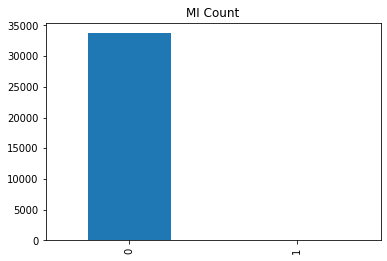

In [30]:
df_diag_person['MI'].value_counts().plot(kind='bar', title='MI Count')

In [31]:
df_diag_person.head()

,personid,diagdate,diagcode,diaglocalcode,diagdept,sex,Birthyeargroup,ethnicity,MI
0,125349,1/1/2005 9:06,K35.9,DC9833,E,1,10,1,0
1,331354,1/10/1996 15:02,M30.3,DC5242,E,1,20,1,0
2,305626,1/10/1996 17:53,R06.0,DC8864,E,1,7,1,0
3,388717,1/10/2001 0:00,K83.8,DC6424,O,1,9,1,0
4,43398,1/10/2001 0:00,K29.0,DC7463,O,1,13,1,0


## 3. Merge to obtain the final dataset 

In [32]:
# Merge the ecg dataset with the combined diagnosis/personal info dataset with the common column (personid)
df_1 = pd.merge(df_three, df_diag_person, on='personid')
df_1

,personid,RR,PR,QRS,QT,QTc,P_wave_axis,QRS_axis,T_wave_axis,ACCI,diagdate,diagcode,diaglocalcode,diagdept,sex,Birthyeargroup,ethnicity,MI
0,19055,769.0,204.0,116.0,364,414,56.0,-81.0,43.0,8,8/1/2005 0:00,G51.3,DC2948,O,1,12,1,0
1,19055,1000.0,220.0,124.0,428,428,59.0,-74.0,33.0,8,8/1/2005 0:00,G51.3,DC2948,O,1,12,1,0
2,19055,769.0,198.0,116.0,398,453,51.0,268.0,36.0,8,8/1/2005 0:00,G51.3,DC2948,O,1,12,1,0
3,19055,1000.0,220.0,124.0,416,416,51.0,-58.0,23.0,8,8/1/2005 0:00,G51.3,DC2948,O,1,12,1,0
4,19055,968.0,228.0,122.0,436,442,54.0,-59.0,34.0,9,8/1/2005 0:00,G51.3,DC2948,O,1,12,1,0
5,19055,896.0,220.0,124.0,416,439,57.0,-66.0,38.0,8,8/1/2005 0:00,G51.3,DC2948,O,1,12,1,0
6,19055,1017.0,226.0,132.0,444,439,56.0,-59.0,36.0,9,8/1/2005 0:00,G51.3,DC2948,O,1,12,1,0
7,19055,952.0,216.0,120.0,424,434,52.0,-58.0,30.0,8,8/1/2005 0:00,G51.3,DC2948,O,1,12,1,0
8,64563,811.0,160.0,88.0,384,426,46.0,45.0,49.0,7,9/6/2005 12:25,J00,DC10276,E,1,14,1,0
9,64563,741.0,142.0,92.0,346,401,46.0,50.0,43.0,6,9/6/2005 12:25,J00,DC10276,E,1,14,1,0


In [33]:
df_2 = df_1.drop(columns = ['diagdate', 'diagcode', 'diaglocalcode','diagdept', 'personid', 'ethnicity'])
col_names = df_2.columns
df_2.head()

,RR,PR,QRS,QT,QTc,P_wave_axis,QRS_axis,T_wave_axis,ACCI,sex,Birthyeargroup,MI
0,769.0,204.0,116.0,364,414,56.0,-81.0,43.0,8,1,12,0
1,1000.0,220.0,124.0,428,428,59.0,-74.0,33.0,8,1,12,0
2,769.0,198.0,116.0,398,453,51.0,268.0,36.0,8,1,12,0
3,1000.0,220.0,124.0,416,416,51.0,-58.0,23.0,8,1,12,0
4,968.0,228.0,122.0,436,442,54.0,-59.0,34.0,9,1,12,0


In [34]:
df_2['Birthyeargroup'].value_counts()

13    12268
10    11344
14    11155
9     11151
12    10646
11    10337
8      7324
15     6923
7      4150
16     3401
20     2177
6      2060
17     1769
19     1337
18     1190
21      921
5       597
4       117
3        33
0         3
Name: Birthyeargroup, dtype: int64

In [35]:
df_2.shape

(98903, 12)

In [36]:
df_2['MI'].value_counts()

0    97863
1     1040
Name: MI, dtype: int64

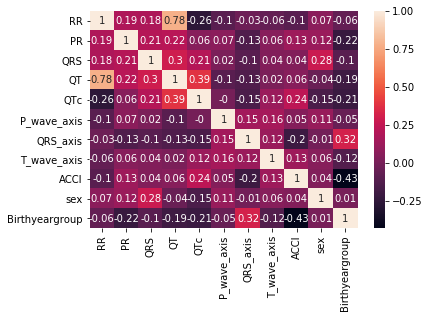

In [37]:
# Created a correlation matrix
correlation_matrix = df_2.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

## Export Final Dataset

In [38]:
df_2.to_csv('Final_Dataset.csv')